# Validaciones - Clasificadores

#### Tablas 2010 - Personas - Total Pais

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - Total Pais

- Poblacion por CONDACT y AGLOMERADO 
    - ***Comparacion INDEC***
- Poblacion por CAT OCUP y AGLOMERADO
- Poblacion por CAT INAC y AGLOMERADO

- Poblacion por CONDACT y PROV
    - ***Comparacion INDEC***
- Poblacion por CAT OCUP y PROV
    - ***Comparacion INDEC***
- Poblacion por CAT INAC y PROV

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - Total Pais

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS

#### Tablas 2010 - Personas - Total Pais

- Poblacion por Ingreso y AGLOMERADO
- Poblacion por Ingreso JUB y AGLOMERADO
- Poblacion por Ingreso y PROV
- Poblacion por Ingreso JUB y PROV

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS


#### Tablas 2010 - Personas - Total Pais

- Poblacion por Informalidad (PP07K)

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por Informalidad (PP07K)

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por Informalidad (PP07K)

In [1]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from numpy import array, nan

def load_spreadsheet(key, worksheet = 0):

    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
             './../../../Desktop/fourth-stock-325317-605e9494d4f6.json', scope) # Your json file here

    gc = gspread.authorize(credentials)

    wks = gc.open_by_key(key).get_worksheet(worksheet)

    data = array(wks.get_all_values())

#     # 1 line header
# #     header_0 = pd.Series(data[0, 1:]).replace('', nan).fillna(method = 'pad').values
    
#     # 2 lines header
#     header_0 = pd.Series(data[0, 2:]).replace('', nan).fillna(method = 'pad').values
#     header_1 = array(data[1, 2:])
#     header = pd.MultiIndex.from_arrays([header_0, header_1]) #zip(header_0, header_1)
    
#     index_0 = pd.Series(data[1:, 0]).replace('', nan).fillna(method = 'pad').values
    
#     sheet = pd.DataFrame(data[1:, 1:], columns=header_0, index = index_0)

    return data


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza/pobreza_0.01_q2010-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-08-15.csv',
 './../data/Pobreza/pobreza_0.0

In [3]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [4]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

## Cantidad Personas (2010) Por Condicion de ocupacion

### Total Pais

In [5]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,9704400.0,24.3
1,18570675.0,46.4
2,1328225.0,3.3
3,10402100.0,26.0
TOTAL,40005400.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0,20407325.0,51.0
1,734025.0,1.8
2,4338325.0,10.8
3,14111450.0,35.3
4,414275.0,1.0
TOTAL,40005400.0,99.9


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0,20167700.0,50.4
1,3862900.0,9.7
2,24700.0,0.1
3,8330100.0,20.8
4,2861800.0,7.2
5,3991000.0,10.0
6,108700.0,0.3
7,658500.0,1.6
TOTAL,40005400.0,100.1


### 31 Aglomerados

In [6]:
data = df10.loc[df10.AGLO_si == 1]

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,5778200.0,22.9
1,12391900.0,49.1
2,935300.0,3.7
3,6139400.0,24.3
TOTAL,25244800.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0,12135850.0,48.1
1,559400.0,2.2
2,2575975.0,10.2
3,9710900.0,38.5
4,262675.0,1.0
TOTAL,25244800.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0,13472400.0,53.4
1,2373000.0,9.4
2,16200.0,0.1
3,4984900.0,19.7
4,1589200.0,6.3
5,2428500.0,9.6
6,52800.0,0.2
7,327800.0,1.3
TOTAL,25244800.0,100.0


## Cantidad de Personas, por Aglomerado

In [7]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

CONDACT,0,1,2,3
NOMAGLO,,,,
Bahia Blanca,62400.0,143125.0,10575.0,77600.0
CABA,466100.0,1644925.0,87375.0,669500.0
Catamarca,44400.0,84900.0,6600.0,39700.0
Cdro Rivadavia,39100.0,77875.0,5425.0,37600.0
Concordia,43900.0,66525.0,3475.0,36600.0
Cordoba,316100.0,713100.0,58200.0,360100.0
Corrientes,83600.0,155300.0,13400.0,87700.0
Formosa,56500.0,94525.0,6575.0,62800.0
Fuera de aglom.,3926200.0,6178775.0,392925.0,4262700.0


### CAT_OCUP

CAT_OCUP,0,1,2,3,4
NOMAGLO,,,,,
Bahia Blanca,143250.0,8500.0,30375.0,110275.0,1300.0
CABA,1150600.0,124675.0,265450.0,1317675.0,9500.0
Catamarca,86300.0,3350.0,16425.0,64900.0,4625.0
Cdro Rivadavia,77925.0,1600.0,10300.0,70075.0,100.0
Concordia,81225.0,2400.0,14375.0,51800.0,700.0
Cordoba,687775.0,37075.0,135200.0,574875.0,12575.0
Corrientes,176550.0,5625.0,31675.0,120175.0,5975.0
Formosa,120875.0,2200.0,21325.0,71250.0,4750.0
Fuera de aglom.,8271475.0,174625.0,1762350.0,4400550.0,151600.0


### CAT_INAC

CAT_INAC,0,1,2,3,4,5,6,7
NOMAGLO,,,,,,,,
Bahia Blanca,155300.0,33100.0,0.0,61800.0,16800.0,23800.0,200.0,2700.0
CABA,1752600.0,364000.0,4700.0,414300.0,110500.0,197800.0,1800.0,22200.0
Catamarca,91500.0,12100.0,0.0,41500.0,10000.0,17700.0,200.0,2600.0
Cdro Rivadavia,83400.0,10900.0,100.0,30600.0,12700.0,19200.0,400.0,2700.0
Concordia,70200.0,13200.0,100.0,33900.0,10300.0,19800.0,700.0,2300.0
Cordoba,777200.0,141400.0,300.0,288200.0,85200.0,132800.0,2100.0,20300.0
Corrientes,169500.0,24900.0,100.0,79900.0,24500.0,33200.0,900.0,7000.0
Formosa,101400.0,14900.0,100.0,58600.0,17900.0,21600.0,1100.0,4800.0
Fuera de aglom.,6695300.0,1489900.0,8500.0,3345200.0,1272600.0,1562500.0,55900.0,330700.0


In [8]:
### Personas por CONDACT y AGLOMERADO. Comparacion INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=2)

df_ = pd.DataFrame(datos)
## Set index
df_ = df_.set_index([0, 1, 2, 3])

## Set header
df_, df_.columns = df_[2:] , df_.iloc[1]
df_.columns.name = 'CONDACT'

df_.index.names = ['AGLO_ID', 'AGLOMERADO','NOMAGLO','Q']
df_ = df_.astype(int)
# df_.head()

# ### Data MI
# data = df10; col = 'CONDACT'
# tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
# tabla = tabla.unstack()
# tabla = tabla.fillna(0)
# tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

In [9]:
# info = pd.concat([df_.sum(), tabla.sum()], axis = 1).dropna()#.sum()

# fig, axs = plt.subplots(1, figsize = (5, 4))

# info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

# plt.plot([1e6, 2.5e7], [1e6, 2.5e7], lw = 1, linestyle = '--', c = '.5')
# axs.set_xscale('log'); axs.set_yscale('log'); 
# axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
# plt.show()


In [10]:
# info = pd.concat([df_[1], tabla[1]], axis = 1).dropna()#.sum()
# info.columns = ['INDEC', 'MI']
# fig, axs = plt.subplots(1, figsize = (5, 4))

# info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

# plt.plot([1e5, 1e7], [1e5, 1e7], lw = 1, linestyle = '--', c = '.5')
# axs.set_xscale('log'); axs.set_yscale('log'); 
# axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
# plt.show()


## Cantidad de Personas, por Provincia

In [11]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
#     tabla.at[(99, 'TOTAL')] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

,CONDACT,0,1,2,3
PROV,NOMPROV,,,,
2,Ciudad Autónoma de Buenos Aires,466100.0,1645625.0,87575.0,669600.0
6,Buenos Aires,3684600.0,7582825.0,547975.0,3800900.0
10,Catamarca,106900.0,156025.0,12775.0,97200.0
14,Córdoba,754900.0,1544000.0,105100.0,881500.0
18,Corrientes,264500.0,385275.0,25025.0,307000.0
22,Chaco,302700.0,411050.0,26150.0,309000.0
26,Chubut,128500.0,245850.0,17050.0,113300.0
30,Entre Ríos,313300.0,545375.0,28625.0,348400.0
34,Formosa,161900.0,199225.0,11975.0,161800.0


### CAT_OCUP

,CAT_OCUP,0,1,2,3,4
PROV,NOMPROV,,,,,
2,Ciudad Autónoma de Buenos Aires,1150700.0,124775.0,265650.0,1318275.0,9500.0
6,Buenos Aires,7612500.0,280600.0,1758450.0,5826725.0,138025.0
10,Catamarca,207500.0,4050.0,39450.0,113800.0,8100.0
14,Córdoba,1657000.0,68000.0,343725.0,1193550.0,23225.0
18,Corrientes,578875.0,11175.0,102250.0,272300.0,17200.0
22,Chaco,618375.0,8725.0,137425.0,260125.0,24250.0
26,Chubut,245300.0,6175.0,41275.0,209175.0,2775.0
30,Entre Ríos,666250.0,15675.0,120650.0,422500.0,10625.0
34,Formosa,326600.0,3225.0,64875.0,128300.0,11900.0


### CAT_INAC

,CAT_INAC,0,1,2,3,4,5,6,7
PROV,NOMPROV,,,,,,,,
2,Ciudad Autónoma de Buenos Aires,1753500.0,364000.0,4700.0,414400.0,110500.0,197800.0,1800.0,22200.0
6,Buenos Aires,8226200.0,1504500.0,9400.0,3063100.0,1047000.0,1547900.0,36200.0,182000.0
10,Catamarca,178100.0,28200.0,100.0,95800.0,24000.0,36600.0,1300.0,8800.0
14,Córdoba,1670400.0,356000.0,1100.0,664600.0,228200.0,308600.0,8000.0,48600.0
18,Corrientes,411800.0,95400.0,400.0,238200.0,95100.0,109100.0,5200.0,26600.0
22,Chaco,441800.0,83000.0,500.0,275300.0,98900.0,113300.0,6100.0,30000.0
26,Chubut,270300.0,36700.0,300.0,103100.0,33700.0,54200.0,800.0,5600.0
30,Entre Ríos,577100.0,133000.0,600.0,270300.0,101300.0,126800.0,3800.0,22800.0
34,Formosa,212100.0,40500.0,200.0,149300.0,50100.0,62100.0,3300.0,17300.0


### Personas por CAT OCUP y PROVINCIA. Comparacion INDEC

In [12]:
### Data INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=0)

df_ = pd.DataFrame(datos)
## Set index
df_ = df_.set_index([0, 1])

## Set header
df_, df_.columns = df_[2:] , df_.iloc[0].astype(int)
df_.columns.name = 'CAT_OCUP'

df_.index.names = ['PROV', 'NOMPROV']

df_ = df_.astype(int)


### Data MI
data = df10; col = 'CAT_OCUP'
tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

In [13]:
import numpy as np

#### Por CAT OCUP

,INDEC,MI
CAT_OCUP,,
3,12833173,14111450.0
1,1228011,734025.0
2,3437630,4338325.0
4,577932,414275.0
0,22035352,20407325.0


INDEC    40112098.0
MI       40005400.0
dtype: float64

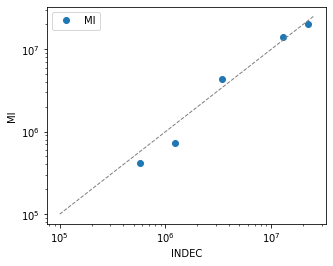

In [14]:
info = pd.concat([df_.sum(), tabla.sum()], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']

display(info)

display(info.sum())

fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

plt.plot([1e5, 2.5e7], [1e5, 2.5e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


#### Por PROVINCIA

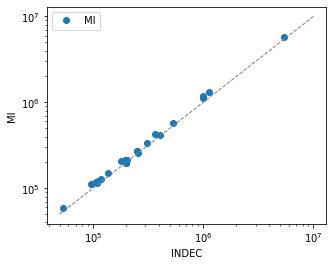

In [15]:
info = pd.concat([df_[3], tabla[3]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

plt.plot([5e4, 1e7], [5e4, 1e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


### Personas por CONDACT y PROVINCIA. Comparacion INDEC

In [16]:
datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=1)

df_ = pd.DataFrame(datos)
## Set index
df_ = df_.set_index([0, 1])

## Set header
df_, df_.columns = df_[2:] , df_.iloc[0].astype(int)
df_.columns.name = 'CONDACT'

df_.index.names = ['PROV', 'NOMPROV']
df_ = df_.astype(int)

### Data MI
data = df10; col = 'CONDACT'
tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

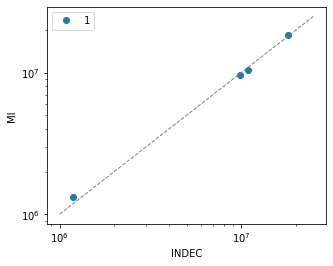

In [17]:
info = pd.concat([df_.sum(), tabla.sum()], axis = 1).dropna()#.sum()

fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

plt.plot([1e6, 2.5e7], [1e6, 2.5e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


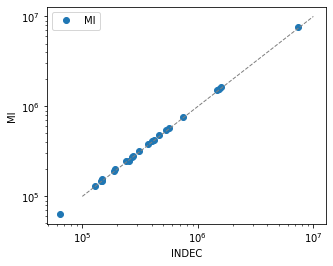

In [18]:
info = pd.concat([df_[1], tabla[1]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

plt.plot([1e5, 1e7], [1e5, 1e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


## Cantidad Personas, Series de Tiempo

### CONDACT

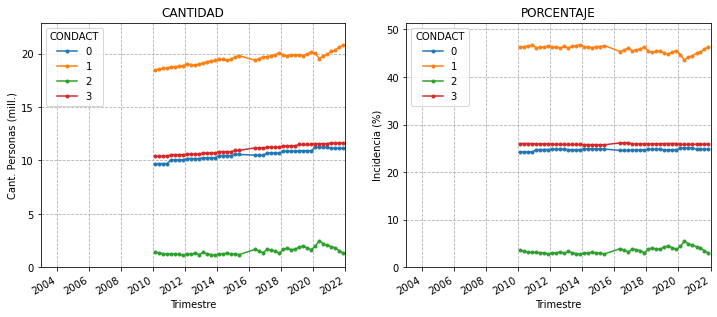

### CAT_OCUP

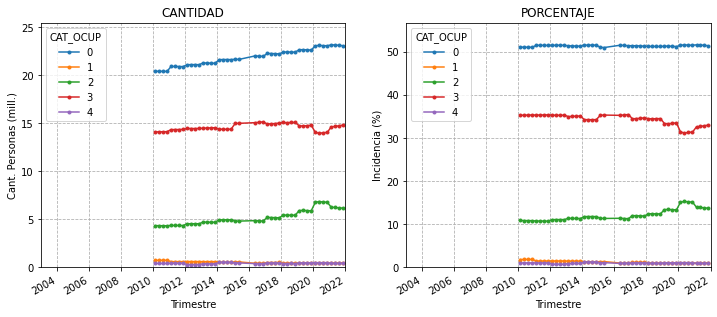

### CAT_INAC

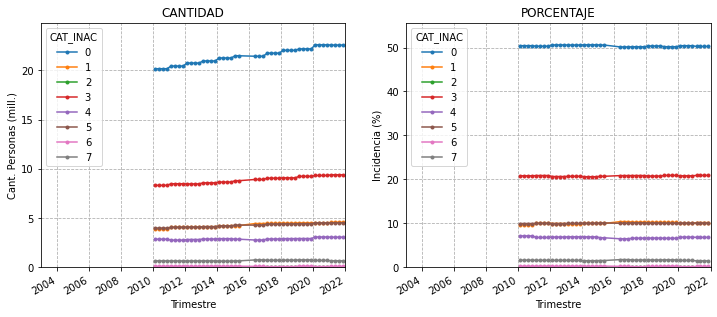

In [19]:
for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    
    fig, axs = plt.subplots(1, 2, figsize = (12, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ax = axs[1]
    ax.set_title('PORCENTAJE')
    table_pct.plot(ax =ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table_pct.max().max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    table.plot(ax = ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table.max().max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')

    plt.show()

## Cantidad Personas (2010) Por INGRESO SI/NO

### Total Pais

In [20]:
df_list = []
for f in allFiles:
    print(f)
    groupers = ['AGLOMERADO', 'NOMPROV']
    vars_ = ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
    
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

In [21]:
data = df10

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### INGRESO

,Cantidad,Porcentaje
INGRESO,,
0,16194625.0,40.5
1,23810775.0,59.5
TOTAL,40005400.0,100.0


### INGRESO_NLB

,Cantidad,Porcentaje
INGRESO_NLB,,
0,31267450.0,78.2
1,8737950.0,21.8
TOTAL,40005400.0,100.0


### INGRESO_JUB

,Cantidad,Porcentaje
INGRESO_JUB,,
0,34704075.0,86.7
1,5301325.0,13.3
TOTAL,40005400.0,100.0


### INGRESO_SBS

,Cantidad,Porcentaje
INGRESO_SBS,,
0,37844300.0,94.6
1,2161100.0,5.4
TOTAL,40005400.0,100.0


### 31 Aglomerados

In [22]:
data = df10.loc[data.AGLO_si == 1]

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### INGRESO

,Cantidad,Porcentaje
INGRESO,,
0,9714000.0,38.5
1,15530800.0,61.5
TOTAL,25244800.0,100.0


### INGRESO_NLB

,Cantidad,Porcentaje
INGRESO_NLB,,
0,19914000.0,78.9
1,5330800.0,21.1
TOTAL,25244800.0,100.0


### INGRESO_JUB

,Cantidad,Porcentaje
INGRESO_JUB,,
0,21908175.0,86.8
1,3336625.0,13.2
TOTAL,25244800.0,100.0


### INGRESO_SBS

,Cantidad,Porcentaje
INGRESO_SBS,,
0,24109175.0,95.5
1,1135625.0,4.5
TOTAL,25244800.0,100.0


## Cantidad de Personas, por Aglomerado

In [23]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### INGRESO

INGRESO,0,1
NOMAGLO,,
Bahia Blanca,107700.0,186000.0
CABA,777500.0,2090400.0
Catamarca,76300.0,99300.0
Cdro Rivadavia,67750.0,92250.0
Concordia,64950.0,85550.0
Cordoba,543225.0,904275.0
Corrientes,145825.0,194175.0
Formosa,103850.0,116550.0
Fuera de aglom.,6480625.0,8279975.0


### INGRESO_JUB

INGRESO_JUB,0,1
NOMAGLO,,
Bahia Blanca,247875.0,45825.0
CABA,2336425.0,531475.0
Catamarca,158900.0,16700.0
Cdro Rivadavia,144700.0,15300.0
Concordia,133075.0,17425.0
Cordoba,1254850.0,192650.0
Corrientes,305350.0,34650.0
Formosa,198600.0,21800.0
Fuera de aglom.,12795900.0,1964700.0


## Cantidad de Personas, por Provincia

In [24]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMPROV', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### INGRESO

INGRESO,0,1
NOMPROV,,
Buenos Aires,6051900.0,9564400.0
Catamarca,179300.0,193600.0
Chaco,496350.0,552550.0
Chubut,210975.0,293725.0
Ciudad Autónoma de Buenos Aires,777800.0,2091100.0
Corrientes,451450.0,530350.0
Córdoba,1278225.0,2007275.0
Entre Ríos,521825.0,713875.0
Formosa,267950.0,266950.0


### INGRESO_JUB

INGRESO_JUB,0,1
NOMPROV,,
Buenos Aires,13504600.0,2111700.0
Catamarca,334100.0,38800.0
Chaco,942050.0,106850.0
Chubut,452625.0,52075.0
Ciudad Autónoma de Buenos Aires,2337425.0,531475.0
Corrientes,863225.0,118575.0
Córdoba,2815725.0,469775.0
Entre Ríos,1065650.0,170050.0
Formosa,478950.0,55950.0


## Cantidad Personas, Series de Tiempo

### INGRESO. Personas.

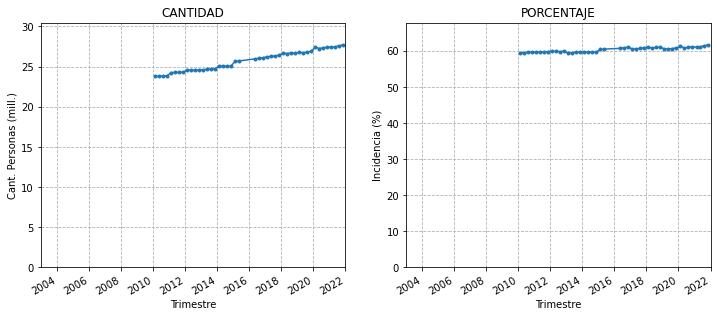

### INGRESO_NLB. Personas.

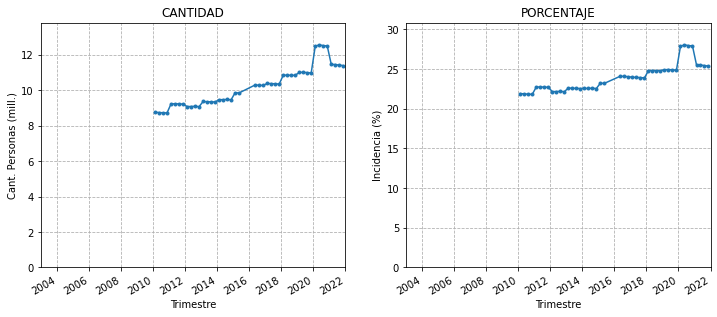

### INGRESO_JUB. Personas.

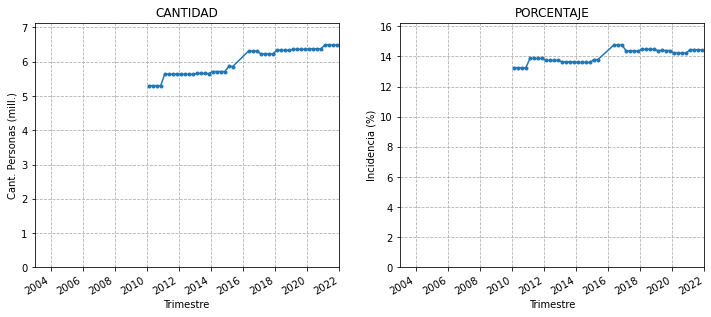

### INGRESO_SBS. Personas.

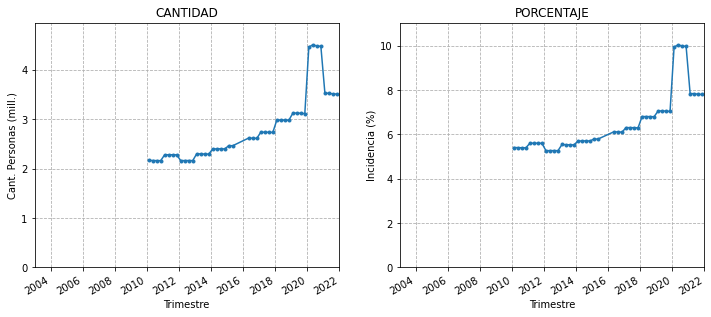

In [25]:
for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col+'. Personas.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ax = axs[1]
    ax.set_title('PORCENTAJE')
    table_pct[1].plot(ax =ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table_pct[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    table[1].plot(ax = ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')

    plt.show()

## Cantidad Personas (2010) Por Formalidad Laboral

### Total Pais

In [26]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO']
    vars_ = ['PP07K']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'AGLOMERADO'] + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

In [27]:
data = df10

for col in ['PP07K']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### PP07K

,Cantidad,Porcentaje
PP07K,,
0,26710250.0,66.8
1,7648075.0,19.1
2,68350.0,0.2
3,143325.0,0.4
4,5431375.0,13.6
5,3050.0,0.0
9,975.0,0.0
TOTAL,40005400.0,100.1


### 31 Aglomerados

In [28]:
data = df10.loc[data.AGLO_si == 1]

for col in ['PP07K']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### PP07K

,Cantidad,Porcentaje
PP07K,,
0,16116550.0,63.8
1,5511025.0,21.8
2,51400.0,0.2
3,109800.0,0.4
4,3452500.0,13.7
5,2650.0,0.0
9,875.0,0.0
TOTAL,25244800.0,99.9


## Cantidad Personas, Series de Tiempo

### PP07K

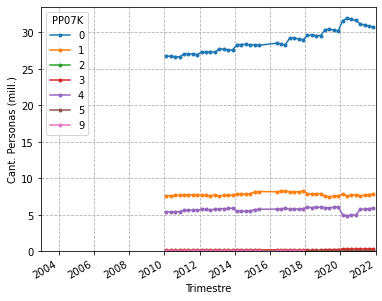

In [29]:
for col in ['PP07K']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()